In [184]:
%pip install imblearn
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

Note: you may need to restart the kernel to use updated packages.


In [185]:
df = pd.read_csv('spambase.data')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [186]:
df = df.set_axis(["make", "address","all", "3d", "our", "over", "remove", "internet", "order", "mail", "receive", "will", "people", "report", "addresses", "free", "business", "email", "you", "credit", "your", "font", "000", "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference", ";","(", "[", "!", "$", "#", "length_average", "length_longest", "length_total", "spam_or_not"], axis="columns")

In [187]:
df.loc[len(df.index)] = [0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1]

In [188]:
df.tail()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,length_average,length_longest,length_total,spam_or_not
4596,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4.0,14.0,0.0
4597,0.30,0.00,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6.0,118.0,0.0
4598,0.96,0.00,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5.0,78.0,0.0
4599,0.00,0.00,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5.0,40.0,0.0
4600,0.00,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.778,0.0,0.0,3.756,61.0,278.0,1.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            4601 non-null   float64
 1   address         4601 non-null   float64
 2   all             4601 non-null   float64
 3   3d              4601 non-null   float64
 4   our             4601 non-null   float64
 5   over            4601 non-null   float64
 6   remove          4601 non-null   float64
 7   internet        4601 non-null   float64
 8   order           4601 non-null   float64
 9   mail            4601 non-null   float64
 10  receive         4601 non-null   float64
 11  will            4601 non-null   float64
 12  people          4601 non-null   float64
 13  report          4601 non-null   float64
 14  addresses       4601 non-null   float64
 15  free            4601 non-null   float64
 16  business        4601 non-null   float64
 17  email           4601 non-null   float6

In [190]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,length_average,length_longest,length_total,spam_or_not
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.023029,0.014917,0.055031,0.001528,0.031222,0.016310,0.015709,0.009477,0.017123,0.013169,...,0.008797,0.014257,0.004160,0.008285,0.012629,0.002231,0.003805,0.005123,0.017821,0.394045
std,0.067259,0.090376,0.098852,0.032589,0.067251,0.046569,0.053843,0.036100,0.052969,0.035465,...,0.055524,0.027723,0.026806,0.025115,0.040960,0.021652,0.028806,0.019513,0.038280,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000501,0.002146,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006665,0.000000,0.000000,0.000000,0.000000,0.001158,0.001402,0.005934,0.000000
75%,0.000000,0.000000,0.082353,0.000000,0.038000,0.000000,0.000000,0.000000,0.000000,0.008801,...,0.000000,0.019278,0.000000,0.009699,0.008662,0.000000,0.002457,0.004205,0.016730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
df['spam_or_not'].value_counts()

spam_or_not
0.0    2788
1.0    1813
Name: count, dtype: int64

<Axes: xlabel='spam_or_not'>

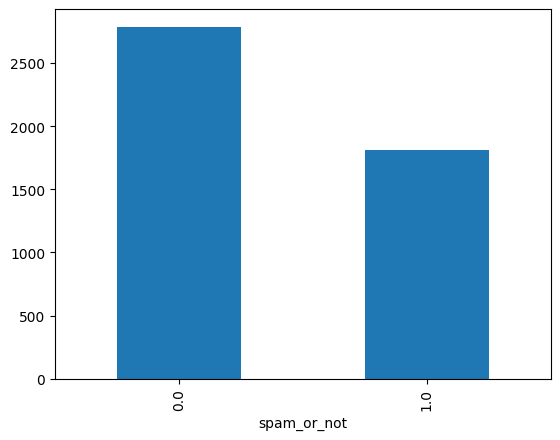

In [192]:
df['spam_or_not'].value_counts().plot(kind='bar')

In [193]:
x = df.drop('spam_or_not', axis=1)
y = df['spam_or_not']
x.shape, y.shape

((4601, 57), (4601,))

<Axes: xlabel='spam_or_not'>

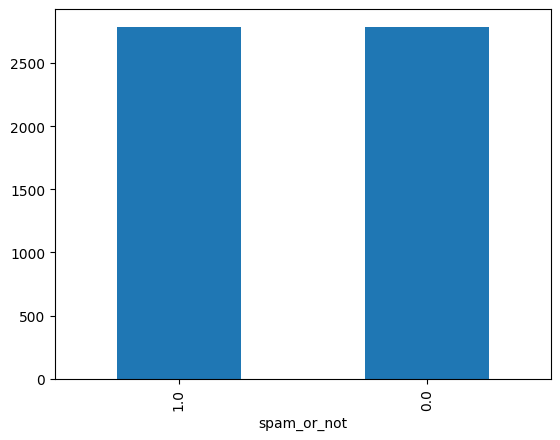

In [194]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts().plot(kind='bar')

In [195]:
df['spam_or_not'] = df['spam_or_not'].astype(int)

<Axes: >

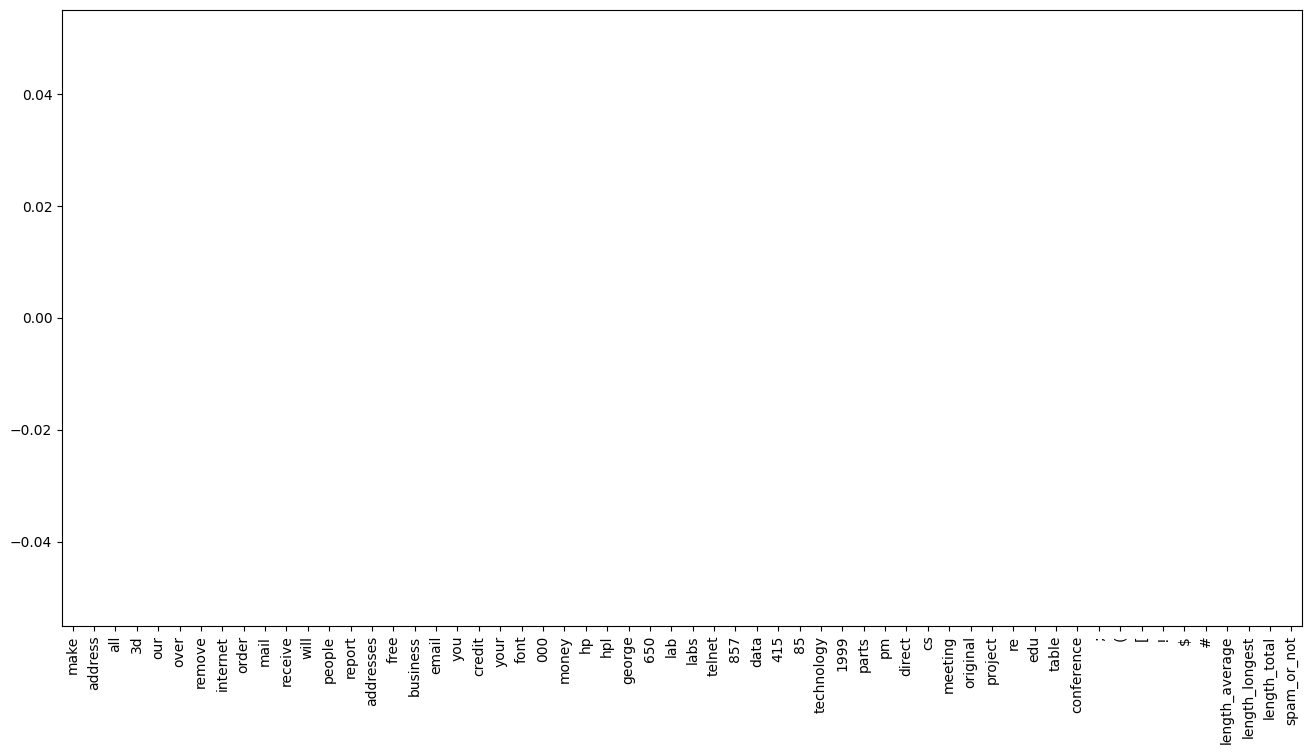

In [196]:
df.isnull().sum().plot(figsize=(16,8),kind='bar')

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier,RandomForestClassifier

from sklearn.metrics import classification_report

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33)
x_train.shape, x_test.shape

((3735, 57), (1841, 57))

In [199]:
def model_acc(model):
    model.fit(x_train,y_train)
    acc = model.score(x_test, y_test)
    cross_val = cross_val_score(model, x_smote, y_smote, cv=5).mean()
    print('model name == '+ str(model) + ', model accuracy = '+ str(acc) + ', corss validation = '+ str(cross_val))

In [200]:
DecisionTreeClassifier = DecisionTreeClassifier()
LogisticRegression = LogisticRegression()

model_acc(DecisionTreeClassifier)
model_acc(LogisticRegression)

model name == DecisionTreeClassifier(), model accuracy = 0.9234111895708854, corss validation = 0.8927518202420559
model name == LogisticRegression(), model accuracy = 0.9016838674633352, corss validation = 0.88396274330167


In [201]:
AdaBoostClassifier = AdaBoostClassifier()
GradientBoostingClassifier = GradientBoostingClassifier()
BaggingClassifier = BaggingClassifier()
RandomForestClassifier = RandomForestClassifier()

model_acc(AdaBoostClassifier)
model_acc(GradientBoostingClassifier)
model_acc(BaggingClassifier)
model_acc(RandomForestClassifier)

model name == AdaBoostClassifier(), model accuracy = 0.951113525258012, corss validation = 0.9069180449073404
model name == GradientBoostingClassifier(), model accuracy = 0.957631721890277, corss validation = 0.9253912917691306
model name == BaggingClassifier(), model accuracy = 0.9527430744160782, corss validation = 0.9212683028754199
model name == RandomForestClassifier(), model accuracy = 0.9663226507332972, corss validation = 0.9363337994438818


In [202]:
pred_val = RandomForestClassifier.predict(x_test)

pd.DataFrame(classification_report(y_test, pred_val, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.952688,0.980241,0.966323,0.966465,0.966712
recall,0.980088,0.953042,0.966323,0.966565,0.966323
f1-score,0.966194,0.966450,0.966323,0.966322,0.966324
support,904.000000,937.000000,0.966323,1841.000000,1841.000000


In [203]:
param_grid = {'n_estimators' : [100, 200, 300], 'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth' : [10,20,30]}

grid_obj = GridSearchCV(estimator=RandomForestClassifier, param_grid=param_grid, cv=5, verbose=2)
grid_fit = grid_obj.fit(x_train, y_train)
best_model = grid_fit.best_estimator_
best_model_score = best_model.score(x_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   1.2s
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   1.2s
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   1.5s
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   1.5s
[CV] END .....criterion=gini, max_depth=10, n_estimators=200; total time=   2.9s
[CV] END .....criterion=gini, max_depth=10, n_estimators=200; total time=   2.3s
[CV] END .....criterion=gini, max_depth=10, n_estimators=200; total time=   2.4s
[CV] END .....criterion=gini, max_depth=10, n_estimators=200; total time=   2.3s
[CV] END .....criterion=gini, max_depth=10, n_estimators=200; total time=   2.9s
[CV] END .....criterion=gini, max_depth=10, n_estimators=300; total time=   3.9s
[CV] END .....criterion=gini, max_depth=10, n_e

In [206]:
best_model

RandomForestClassifier(criterion='log_loss', max_depth=20, n_estimators=200)

In [210]:
pred_val = best_model.predict(x_test)

pd.DataFrame(classification_report(y_test, pred_val, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.956943,0.983553,0.970125,0.970248,0.970486
recall,0.983407,0.957311,0.970125,0.970359,0.970125
f1-score,0.969995,0.970254,0.970125,0.970124,0.970127
support,904.000000,937.000000,0.970125,1841.000000,1841.000000


In [211]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model,file)